# Ch05
## 5장 차원 축소를 사용한 데이터 압축

## 5.1 주성분 분석을 통한 비지도 차원 축소
- 주성분 분석 : Principal Componenet Analysis, PCA

### 주성분 추출

- 주성분 차원 == 원본 데이터셋 차원
- 주성분 탐색 : 중심으로부터 분산이 가장 큰 방향을 찾음
- 2번째 주성분 : 첫 번째 주성분과 방향이 얽히지 않도록 직각 방향으로 설정
- 3차원 이상의 고차원 데이터일 경우 첫 번째 주성분과 직각인 여러 방향 중 가장 분산이 큰 방향부터 n번째 주성분이 됨

In [1]:
from IPython.display import Image
Image(url='https://git.io/JtsvW', width=400) 

ex) 데이터들을 PC1 축에 투영하여 나타난 점 == 1차원

-> 원본 차원보다 적은 개수의 주성분 축을 사용하여 데이터를 변환하면
데이터 차원을 압축시킬 수 있음

In [2]:
# 주성분 추출

import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# 훈련 : 테스트 -> 7:3

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# \ : 하나의 코드 여러 줄 분할
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,  
                     stratify=y,
                     random_state=0)

```train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)``` : 데이터 분할

- ```arrays```: 분할시킬 데이터
- ```test_size``` : 테스트 데이터셋의 비율 or 개수 (float or int, d = 0.25)
- ```train_size``` : 학습 데이터셋의 비율 or 개수
- ```random_state``` : 데이터 분할 시 셔플 시드
- ```shuffle``` : 셔플 여부 (default = True)
- ```stratify``` : =Y -> 지정한 데이터의 분할 후 비율 유지

In [4]:
# 데이터 표준화

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
# 공분산 행렬의 고유값 분해

import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('고유값 \n%s' % eigen_vals)

고유값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


<공분산>
- 공분산 : 두 확률변수 사이 상관관계를 의미
- 공분산 > 0 : X 증가 -> Y 증가
- 공분산 < 0 : X 증가 -> Y 감소
- 공분산 = 0 : 아무 관계 X

<고유값>
- 고유값 : 고유 벡터 방향의 벡터공간 크기
- == 설명된 분산의 비율, 고유벡터 순서를 나타냄
- 고유값이 큰 순으로 고유 벡터 정렬 -> 중요한 순으로 주성분 획득


```np.cov()``` : 주어진 데이터로부터 공분산 행렬 반환

```np.linalg.eig()``` : 주어진 데이터로부터 고유값 및 고유벡터 반환

\* ```np.linalg.eigh()``` : 복소수 고유값 반환 방지, 비대칭 정방행렬 분해 X

### 총분산과 설명된 분산

In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

```tot``` : 고유값의 총합

```var_exp``` : 각 고유값/총합 == 비율 리스트

```cum_var_exp``` : 각 원소에서 누적합을 계산한 배열

```np.cumsum()``` : 배열에서 주어진 축에 따라 누적되는 원소들의 누적 합 계산

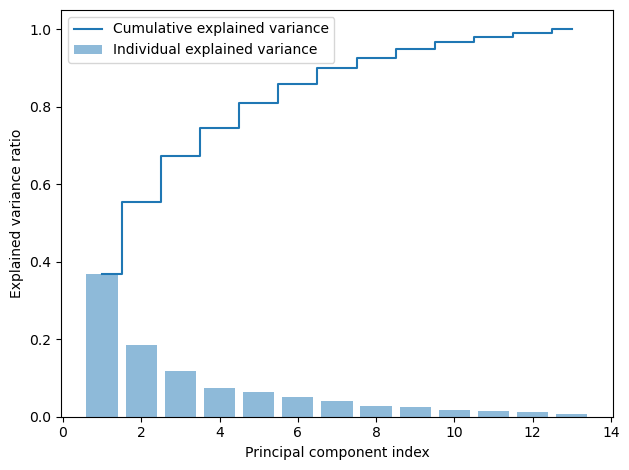

In [7]:
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

- 계단선 : 누적합
- 막대 : 실제 비율값

누적합 계단을 보면 첫 번째(가장 큰) 고유값이 가장 큰 분산을 나타냄을 알 수 있음.

### 특성 변환

    고유 벡터 : n개의 열 -> n개의 특성

                n개의 행 -> n개의 주성분

In [8]:
# (고윳값, 고유벡터) 튜플의 리스트 생성
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# (고윳값, 고유벡터) 튜플을 내림차순 정렬
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# [0][1], [1][1] : 2개의 주성분만 사용
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 W:\n', w)

투영 행렬 W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


```np.hstack()``` : 두 배열을 가로로 결합

```arr[np.newaxis]``` : 배열의 차원 증가, ```None```과 동일

In [9]:
# 투영행렬 w 와 점곱하여 n개의 샘플이 2차원으로 줄어듦
# (n, 13)x(13, 2) => (n, 2)

X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

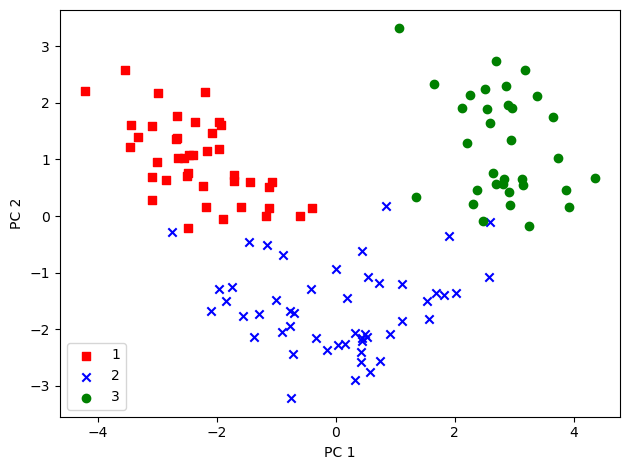

In [10]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

### 사이킷런의 주성분 분석

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

```sklearn.decomposition.PCA()``` : 주성분 추출

```pca.explained_variance_ratio_``` : 고유값 속성

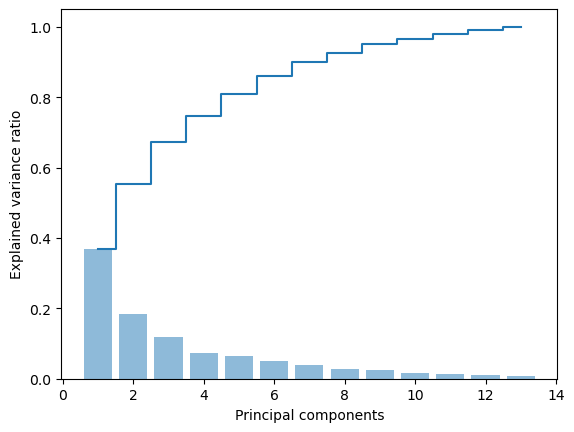

In [12]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [13]:
pca = PCA(n_components=2)  # n_components : 주성분 개수
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

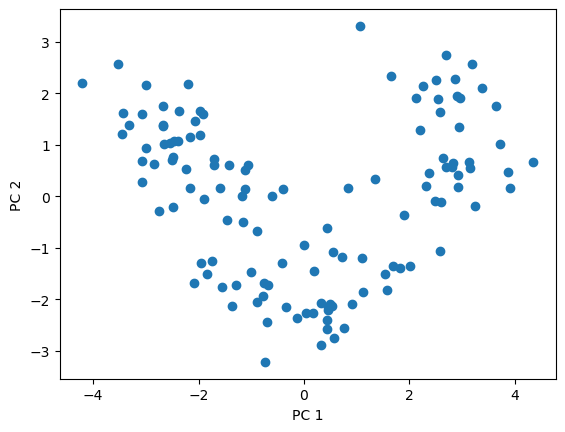

In [14]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [15]:
# 결정 경계 도식화 함수

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스별로 샘플을 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor=None if idx==1 else 'black',
                    marker=markers[idx], 
                    label=cl)

In [16]:
# 처음 두 개의 주성분을 사용하여 로지스틱 회귀 분류기 훈련

from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_pca, y_train)

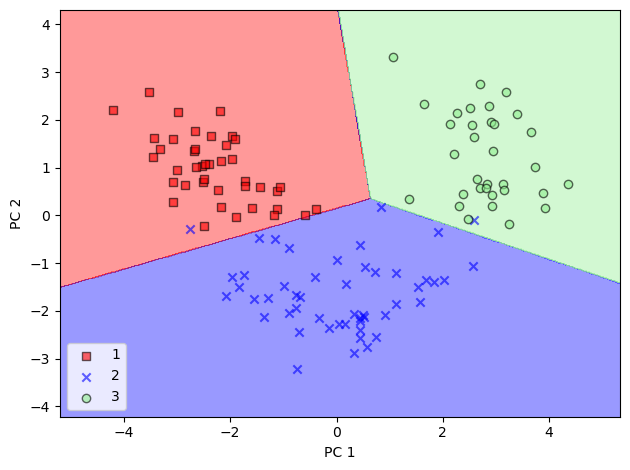

In [17]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

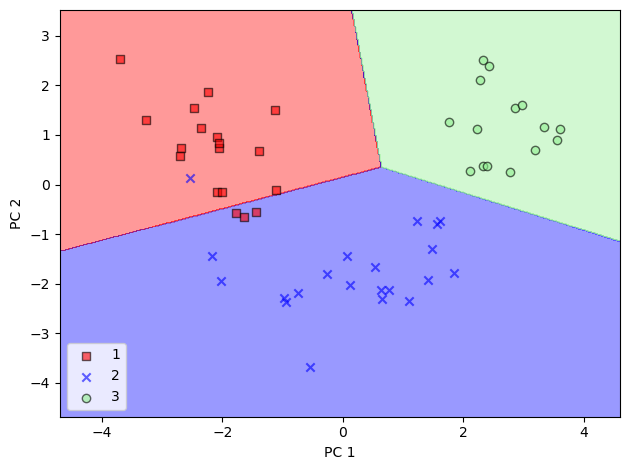

In [18]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

In [19]:
pca = PCA(n_components=None)  # None : default
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

```n_components```에 (0, 1) 사이 실수를 입력하면 설명된 분산의 비율을 나타냄

In [20]:
pca = PCA(n_components=0.95)
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 10
설명된 분산 비율: 0.9662714406558743


```n_components``` = 0.95 -> 95% 비율을 달성하기 위해 필요한 주성분 개수는 10개

In [21]:
pca = PCA(n_components='mle')
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 9
설명된 분산 비율: 0.9499753029186233


```n_components = 'mle'``` : 토마스 민카가 제안한 차원 선택 방식 사용

In [22]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=9)
for batch in range(len(X_train_std)//25+1):
    X_batch = X_train_std[batch*25:(batch+1)*25]
    ipca.partial_fit(X_batch)

print('주성분 개수:', ipca.n_components_)
print('설명된 분산 비율:', np.sum(ipca.explained_variance_ratio_))

주성분 개수: 9
설명된 분산 비율: 0.9478392700446668


- ```PCA``` : 배치로 실행됨 -> 대용량 데이터셋 처리에 많은 메모리 필요
- ```IncrementalPCA``` : 데이터셋의 일부만을 사용하여 반복적 훈련 가능
- 위의 ```n_components```에는 정수 값만 입력 가능
- ```partial_fit()``` : 네트워크나 로컬 파일로부터 조금씩 데이터를 받아와 훈련
- ```fit()``` : ```np.memmap```을 사용하여 로컬파일로부터 데이터를 조금씩 읽어옴
- 한 번에 읽어올 데이터 크기는 ```IncrementalPCA.batch_size```로 지정(default = 5\*특성)

## 5.2 선형 판별 분석을 통한 지도방식의 데이터 압축
### 주성분 분석 vs. 선형 판별 분석
- 선형 판별 분석 : Linear Discriminant Analysis, LDA
- 또는 Fisher Discriminant Analysis, FDA

In [23]:
Image(url='https://git.io/Jtsv8', width=400) 

- 주성분 분석과 달리 클래스 레이블을 사용하여 클래스 분류에 유리

<선형 판별 분석의 내부 동작 방식>
1. 표준화 전처리
2. 클래스별 평균 벡터 -> 클래스 레이블이 필요
3. 클래스 간 산포 행렬 S_B, 클래스 내 산포 행렬 S_W 계산
4. (S_w^-1)(S_B) 행렬의 고유값 획득
5. 고유값 내림차순 정렬
6. 고유값이 가장 큰 k 개의 고유 벡터 선택
7. 고유 벡터로 만든 변환 행렬로 데이터셋 투영

### 산포 행렬 계산

In [38]:
# 각 클래스에 대한 평균 벡터 계산

np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



- ```np.set_printoptions()``` : 소수점 옵션 출력
- ```precision``` : 몇 째 자리까지 반올림할 것인지(default = 8)
- ```threshold``` : 긴 array 출력 시 몇 개 초과부터 ...으로 줄일 것인지(default = 1000)
- ```formatter``` : 출력 형식 변경 (데이터의 타입 변환 X)

In [39]:
# 클래스 내 산포 행렬 계산

d = 13 # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # 각 클래스에 대한 산포 행렬
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # 열 벡터 생성
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter  # 클래스 산포 행렬 합

print('클래스 내의 산포 행렬: %sx%s' % (S_W.shape[0], S_W.shape[1]))

클래스 내의 산포 행렬: 13x13


In [40]:
print('클래스 레이블 분포: %s' 
      % np.bincount(y_train)[1:])

클래스 레이블 분포: [41 50 33]


In [41]:
# 균일하게 분포하지 않는 클래스 -> 공분산 행렬 사용

d = 13  # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('스케일 조정된 클래스 내의 산포 행렬: %sx%s' % 
      (S_W.shape[0], S_W.shape[1]))

스케일 조정된 클래스 내의 산포 행렬: 13x13


In [42]:
# 클래스 간 산포 행렬 계산

mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # 열 벡터로 만들기
d = 13  # 특성 개수
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # 열 벡터로 만들기
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('클래스 간의 산포 행렬: %sx%s' % (S_B.shape[0], S_B.shape[1]))

클래스 간의 산포 행렬: 13x13


### 새로운 특성 부분 공간을 위한 선형 판별 벡터 선택

In [43]:
# 고유값 분해

eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [44]:
# 고유값의 역순으로 고유 벡터 정렬

# (고윳값, 고유벡터) 튜플의 리스트 생성
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# (고윳값, 고유벡터) 튜플을 내림차순 정렬
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# 고윳값의 역순으로 올바르게 정렬되었는지 확인
print('내림차순의 고윳값:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

내림차순의 고윳값:

349.61780890599397
172.76152218979385
3.2209587419662555e-14
3.2209587419662555e-14
2.6106523402387364e-14
1.7038977764581827e-14
1.7038977764581827e-14
1.687554433463065e-14
1.687554433463065e-14
7.584950171788759e-15
2.9412105155181146e-15
2.9412105155181146e-15
0.0


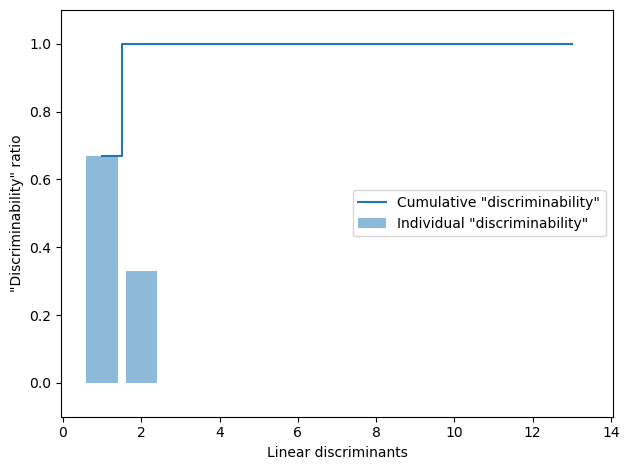

In [31]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [32]:
# 변환행렬 w 계산

w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('행렬 W:\n', w)

행렬 W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


### 새로운 특성 공간으로 샘플 투영

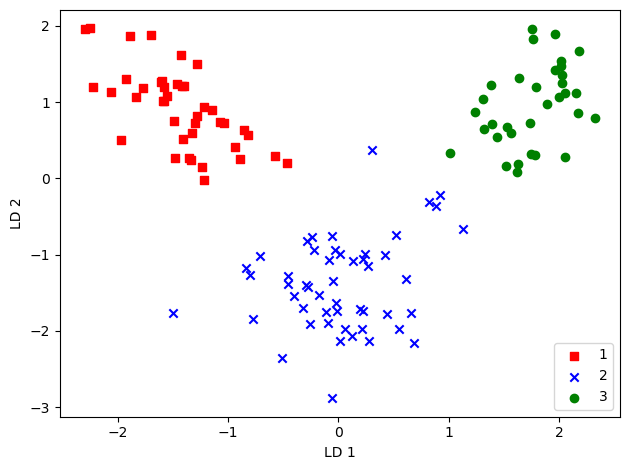

In [33]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

클래스 구분 및 예상 결정 경계 확인